In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from Bio import SeqIO

import sys
sys.path.insert(0, '../models/')
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]=""
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l2 
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, CSVLogger
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import model_from_yaml

from tensorflow.keras import layers

import numpy as np
import h5py
import scipy.io
np.random.seed(1337) # for reproducibility

from tensorflow.keras.layers import *
from tensorflow.keras.layers import Input,Conv1D, Dense,LSTM, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation,AveragePooling1D
from tensorflow.keras import *
#from group_norm import GroupNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2 ,l1
import keras
from tensorflow.keras.initializers import RandomUniform
import keras.backend as K
from random import shuffle
from sklearn.utils import class_weight
from tcn import TCN


#from  pyfasta import Fasta
import gzip
import numpy as np
import re
import random

In [9]:
enh_inp1=Input((41,4))
enh_inp2 = Input((1,256))


enh_x1= Conv1D(8,7,strides=1,padding='same',activation = 'relu',kernel_regularizer = regularizers.l2(1e-3),bias_regularizer = regularizers.l2(1e-4),kernel_initializer='random_normal')(enh_inp1)
enh_x1= Conv1D(16,9,strides=1,padding='same',activation = 'relu',kernel_regularizer = regularizers.l2(1e-3),bias_regularizer = regularizers.l2(1e-4),kernel_initializer='random_normal')(enh_x1)
enh_x1= Flatten()(enh_x1)
enh_x2= Flatten()(enh_inp2)
enh_x = concatenate([enh_x1,enh_x2], axis=1)
enh_x = Dropout(0.75)(enh_x)
x=BatchNormalization()(enh_x)
x= Flatten()(x)

x = Dense(1,activation='sigmoid',kernel_regularizer=l2(0.001),kernel_initializer='he_uniform')(x)
model= Model(inputs=[enh_inp1,enh_inp2],outputs=x)

print (model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 41, 4)]      0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 41, 8)        232         ['input_3[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 41, 16)       1168        ['conv1d_2[0][0]']               
                                                                                                  
 input_4 (InputLayer)           [(None, 1, 256)]     0           []                               
                                                                                            

In [10]:
model_path ="/home/waleed/m5U_deep/m5U--Mature/results/EPI/best_weights.h5" 
model.load_weights(model_path)
enh_ind_test,test_labels=np.load('/home/waleed/m5U_deep/m5U--Mature/m5U/enh_folds/enh_ind_test.npy'), np.load('/home/waleed/m5U_deep/m5U--Mature/m5U/enh_folds/ind_y_test.npy')
enh_kmer_ind = np.load('/home/waleed/m5U_deep/m5U--Mature/m5U/enh_folds/enh_ind_kmer.npy')
y_scores= model.predict([enh_ind_test,enh_kmer_ind])
y_true=test_labels

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 0s 2ms/step



Area under the ROC curve: 0.9510038833347104

Area under Precision-Recall curve: 0.93823835184603
Global Accuracy: 0.9207317073170732
Specificity: 0.9352226720647774
Sensitivity: 0.9061224489795918

F1 score (F-measure): 0.9192546583850932
MCC: 0.8417834104318603


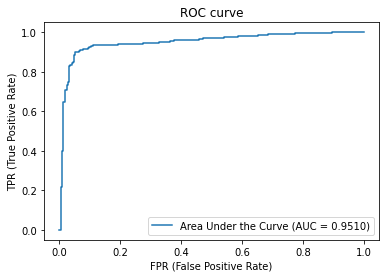

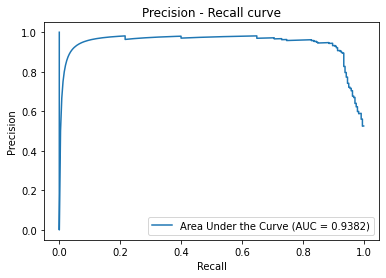

In [11]:
#scikit learn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
%matplotlib inline
#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
# test_integral = np.trapz(tpr,fpr) #trapz is numpy integration
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
#plt.savefig(path_experiment+"ROC.png")
plt.savefig('Promoter-dataset-1-one-hot-code-ROC.png')
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0]  #so the array is increasing (you won't get negative AUC)
recall = np.fliplr([recall])[0]  #so the array is increasing (you won't get negative AUC)
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
#plt.savefig(path_experiment+"Precision_recall.png")

#Confusion matrix
threshold_confusion = 0.5
#print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
#print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
#print ("Precision: " +str(precision))

#Jaccard similarity index
#jaccard_index = jaccard_similarity_score(y_true, y_pred, normalize=True)
#print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))

mcc= matthews_corrcoef(y_true, y_pred)
print ('MCC:', mcc)
